# Case Study Analysis – Wildfire Prediction Samples

This notebook provides a case study-driven analysis of selected wildfire prediction samples (true positives and false negatives) in Spain. Specifically, it:

- Identifies and compares important fire events, including one that was correctly predicted (sample 679) and one that was missed (sample 1645).
- Visualizes the spatial distribution of positive samples using Cartopy maps, colored by wind direction.
- Groups and compares SHAP and Integrated Gradients (IG) values for individual samples:
  - Bar plots show aggregated importance by feature group (e.g., meteorology, fuel, human activity).
  - SHAP values are analyzed both with and without specific features (e.g., `lst_day`) to understand their contribution.
  - False negative and true positive samples are compared side-by-side to highlight key differences in feature attribution.

The goal is to better understand the model's decision-making and uncover critical features that drive wildfire prediction success or failure in challenging cases.


In [23]:
!pip install geopandas matplotlib contextily cartopy shap ipywidgets


In [13]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import cm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.ticker import MultipleLocator
from matplotlib.colors import LinearSegmentedColormap

In [14]:
pos_data = pd.read_csv('/Users/I566184/bachelorarbeit_coding/mesogeos/ml_tracks/a_fire_danger/a.danger_forecasting/positives.csv')
neg_data = pd.read_csv('/Users/I566184/bachelorarbeit_coding/mesogeos/ml_tracks/a_fire_danger/a.danger_forecasting/negatives.csv')

In [15]:
#4. Fire in Spain not regocnized as positive
pos_data[pos_data['sample'] == 1645]

,time,aspect,burned_areas,curvature,d2m,dem,ignition_points,lai,lst_day,lst_night,...,lc_grassland,lc_settlement,lc_shrubland,lc_sparse_vegetation,lc_water_bodies,lc_wetland,population,burned_area_has,time_idx,sample
49350,2022-05-17,36.664577,0.0,-11440.387,283.96823,949.5649,0.0,1.5,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,3.367628,28046.0,0,1645
49351,2022-05-18,36.664577,0.0,-11440.387,283.93564,949.5649,0.0,1.5,NaN,284.38000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.367628,28046.0,1,1645
49352,2022-05-19,36.664577,0.0,-11440.387,285.07065,949.5649,0.0,1.5,299.08000,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,3.367628,28046.0,2,1645
49353,2022-05-20,36.664577,0.0,-11440.387,285.68314,949.5649,0.0,1.5,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,3.367628,28046.0,3,1645
49354,2022-05-21,36.664577,0.0,-11440.387,285.79310,949.5649,0.0,1.5,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,3.367628,28046.0,4,1645
49355,2022-05-22,36.664577,0.0,-11440.387,284.34592,949.5649,0.0,1.5,NaN,283.90000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.367628,28046.0,5,1645
49356,2022-05-23,36.664577,0.0,-11440.387,277.89755,949.5649,0.0,1.5,286.75998,278.32000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.367628,28046.0,6,1645
49357,2022-05-24,36.664577,0.0,-11440.387,277.82610,949.5649,0.0,1.5,286.10000,277.62000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.367628,28046.0,7,1645
49358,2022-05-25,36.664577,0.0,-11440.387,280.20220,949.5649,0.0,2.2,292.66000,282.02000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.367628,28046.0,8,1645
49359,2022-05-26,36.664577,0.0,-11440.387,281.22302,949.5649,0.0,2.2,297.38000,285.58000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.367628,28046.0,9,1645


In [16]:
#all big fires compared, ture Fire Spain:
pos_data_filtered = pos_data[(pos_data['sample'] == 679)]
pos_data_filtered

,time,aspect,burned_areas,curvature,d2m,dem,ignition_points,lai,lst_day,lst_night,...,lc_grassland,lc_settlement,lc_shrubland,lc_sparse_vegetation,lc_water_bodies,lc_wetland,population,burned_area_has,time_idx,sample
20370,2022-06-17,156.99074,0.0,1254.0588,288.08890,795.34845,0.0,1.1,NaN,NaN,...,0.0,0.0,0.378616,0.0,0.0,0.0,2.20923,32528.0,0,679
20371,2022-06-18,156.99074,0.0,1254.0588,286.47210,795.34845,0.0,1.0,NaN,NaN,...,0.0,0.0,0.378616,0.0,0.0,0.0,2.20923,32528.0,1,679
20372,2022-06-19,156.99074,0.0,1254.0588,284.17612,795.34845,0.0,1.0,NaN,NaN,...,0.0,0.0,0.378616,0.0,0.0,0.0,2.20923,32528.0,2,679
20373,2022-06-20,156.99074,0.0,1254.0588,280.76517,795.34845,0.0,1.0,NaN,282.84000,...,0.0,0.0,0.378616,0.0,0.0,0.0,2.20923,32528.0,3,679
20374,2022-06-21,156.99074,0.0,1254.0588,283.72662,795.34845,0.0,1.0,299.30000,NaN,...,0.0,0.0,0.378616,0.0,0.0,0.0,2.20923,32528.0,4,679
20375,2022-06-22,156.99074,0.0,1254.0588,283.94492,795.34845,0.0,1.0,NaN,NaN,...,0.0,0.0,0.378616,0.0,0.0,0.0,2.20923,32528.0,5,679
20376,2022-06-23,156.99074,0.0,1254.0588,283.08002,795.34845,0.0,1.0,NaN,NaN,...,0.0,0.0,0.378616,0.0,0.0,0.0,2.20923,32528.0,6,679
20377,2022-06-24,156.99074,0.0,1254.0588,283.89127,795.34845,0.0,1.0,NaN,NaN,...,0.0,0.0,0.378616,0.0,0.0,0.0,2.20923,32528.0,7,679
20378,2022-06-25,156.99074,0.0,1254.0588,279.18622,795.34845,0.0,1.0,306.12000,282.30000,...,0.0,0.0,0.378616,0.0,0.0,0.0,2.20923,32528.0,8,679
20379,2022-06-26,156.99074,0.0,1254.0588,278.61557,795.34845,0.0,0.8,296.74000,285.13998,...,0.0,0.0,0.378616,0.0,0.0,0.0,2.20923,32528.0,9,679


In [17]:
#all big fires compared, False Negaitve Spain: 
pos_data_filtered = pos_data[(pos_data['sample'] == 1645)]
pos_data_filtered

,time,aspect,burned_areas,curvature,d2m,dem,ignition_points,lai,lst_day,lst_night,...,lc_grassland,lc_settlement,lc_shrubland,lc_sparse_vegetation,lc_water_bodies,lc_wetland,population,burned_area_has,time_idx,sample
49350,2022-05-17,36.664577,0.0,-11440.387,283.96823,949.5649,0.0,1.5,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,3.367628,28046.0,0,1645
49351,2022-05-18,36.664577,0.0,-11440.387,283.93564,949.5649,0.0,1.5,NaN,284.38000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.367628,28046.0,1,1645
49352,2022-05-19,36.664577,0.0,-11440.387,285.07065,949.5649,0.0,1.5,299.08000,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,3.367628,28046.0,2,1645
49353,2022-05-20,36.664577,0.0,-11440.387,285.68314,949.5649,0.0,1.5,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,3.367628,28046.0,3,1645
49354,2022-05-21,36.664577,0.0,-11440.387,285.79310,949.5649,0.0,1.5,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,3.367628,28046.0,4,1645
49355,2022-05-22,36.664577,0.0,-11440.387,284.34592,949.5649,0.0,1.5,NaN,283.90000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.367628,28046.0,5,1645
49356,2022-05-23,36.664577,0.0,-11440.387,277.89755,949.5649,0.0,1.5,286.75998,278.32000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.367628,28046.0,6,1645
49357,2022-05-24,36.664577,0.0,-11440.387,277.82610,949.5649,0.0,1.5,286.10000,277.62000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.367628,28046.0,7,1645
49358,2022-05-25,36.664577,0.0,-11440.387,280.20220,949.5649,0.0,2.2,292.66000,282.02000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.367628,28046.0,8,1645
49359,2022-05-26,36.664577,0.0,-11440.387,281.22302,949.5649,0.0,2.2,297.38000,285.58000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.367628,28046.0,9,1645


In [18]:
#false negative predicted samples from most models
sample_ids = [15499, 15593, 16713, 16701, 16886, 15494, 17040, 16781, 16735, 14600, 15334, 15341, 16696]
neg_data_filtered = neg_data[(neg_data['time_idx'] == 29) & (neg_data['sample'].isin(sample_ids))]
neg_data_filtered

,time,aspect,burned_areas,curvature,d2m,dem,ignition_points,lai,lst_day,lst_night,...,lc_grassland,lc_settlement,lc_shrubland,lc_sparse_vegetation,lc_water_bodies,lc_wetland,population,burned_area_has,time_idx,sample
438029,2021-01-07,173.031170,0.0,-5737.091000,273.16830,884.14710,0.0,NaN,NaN,NaN,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,432.224880,0.0,29,14600
460049,2021-06-30,239.197720,0.0,15.146637,284.23940,56.22079,0.0,1.3,309.68000,295.16000,...,0.000000,0.0,0.522380,0.000000,0.0,0.0,17.952684,0.0,29,15334
460259,2021-07-01,223.943000,0.0,-3076.751700,284.76968,641.71180,0.0,1.8,316.36000,293.63998,...,0.000000,0.0,0.000000,0.015876,0.0,0.0,5.271874,0.0,29,15341
464849,2021-07-29,157.198560,0.0,33322.990000,292.00018,508.86450,0.0,1.8,311.40000,300.12000,...,0.000000,0.0,0.262548,0.000000,0.0,0.0,17.130157,0.0,29,15494
464999,2021-07-30,251.079420,0.0,4590.613000,288.08023,360.87120,0.0,2.2,313.08000,296.22000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,2.477857,0.0,29,15499
467819,2021-08-17,228.551040,0.0,-9276.050000,292.02750,549.33124,0.0,1.9,310.25998,294.19998,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,17.954426,0.0,29,15593
500909,2022-06-10,115.688920,0.0,10042.932000,287.41763,570.94360,0.0,1.9,309.38000,294.66000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,9.316117,0.0,29,16696
501059,2022-06-11,47.522300,0.0,-32143.469000,290.81393,435.25052,0.0,0.6,316.13998,NaN,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,31.014591,0.0,29,16701
501419,2022-06-13,194.754750,0.0,19778.309000,289.06348,543.53860,0.0,0.6,313.13998,300.32000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,144.507980,0.0,29,16713
502079,2022-06-17,283.656100,0.0,3429.925500,287.54047,862.60550,0.0,1.1,NaN,298.75998,...,0.000000,0.0,0.127940,0.000000,0.0,0.0,23.629970,0.0,29,16735


In [19]:
neg_data.columns

Index(['time', 'aspect', 'burned_areas', 'curvature', 'd2m', 'dem',
       'ignition_points', 'lai', 'lst_day', 'lst_night', 'ndvi', 'rh',
       'roads_distance', 'slope', 'smi', 'sp', 'ssrd', 't2m', 'tp',
       'wind_direction', 'wind_speed', 'x', 'y', 'lc_agriculture', 'lc_forest',
       'lc_grassland', 'lc_settlement', 'lc_shrubland', 'lc_sparse_vegetation',
       'lc_water_bodies', 'lc_wetland', 'population', 'burned_area_has',
       'time_idx', 'sample'],
      dtype='object')

In [20]:
pos_testing= pos_data[((pos_data['time'].str.startswith("2022-")) | (pos_data['time'].str.startswith("2021-"))) & (pos_data['time_idx'] == 29)]
pos_testing

,time,aspect,burned_areas,curvature,d2m,dem,ignition_points,lai,lst_day,lst_night,...,lc_grassland,lc_settlement,lc_shrubland,lc_sparse_vegetation,lc_water_bodies,lc_wetland,population,burned_area_has,time_idx,sample
18659,2021-01-18,330.926760,1.0,27889.11100,278.40756,951.85754,187.0,0.3,285.40000,275.60000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,187.0,29,621
18689,2021-01-21,244.666500,1.0,-29852.34400,281.24326,1219.92740,715.0,0.5,281.30000,276.72000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,2.494251,715.0,29,622
18719,2021-08-16,200.106870,1.0,1930.79220,284.69240,371.17110,496.0,0.3,322.96000,294.94000,...,0.093017,0.0,0.000000,0.000000,0.0,0.0,0.993970,496.0,29,623
18749,2021-03-19,178.949280,1.0,-7572.59500,270.02072,1258.73470,0.0,0.9,282.90000,274.28000,...,0.000000,0.0,0.062307,0.000000,0.0,0.0,2.488285,86.0,29,624
18779,2021-03-20,177.769820,1.0,9283.96000,270.90590,649.50960,38.0,1.4,285.38000,274.08000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,5.995989,38.0,29,625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256949,2021-06-19,331.964400,0.0,-6348.14450,282.66510,1198.93420,0.0,0.6,316.53998,297.41998,...,0.000000,0.0,1.000000,0.000000,0.0,0.0,8.555197,159.0,29,8564
256979,2021-06-29,106.676544,0.0,447.27173,288.14820,481.60940,0.0,0.5,314.78000,297.36000,...,0.000000,0.0,0.321138,0.100552,0.0,0.0,87.012764,219.0,29,8565
257009,2021-07-03,313.479160,1.0,10734.83900,285.30820,1077.00220,920.0,0.5,318.90000,296.04000,...,0.000000,0.0,0.168196,0.000000,0.0,0.0,21.462292,920.0,29,8566
257039,2021-07-03,242.836650,1.0,-8640.33200,286.19412,1137.27860,820.0,0.2,NaN,297.08000,...,0.000000,0.0,0.118920,0.000000,0.0,0.0,6.342142,820.0,29,8567


### Plot der positiven Proben mit Cartopy

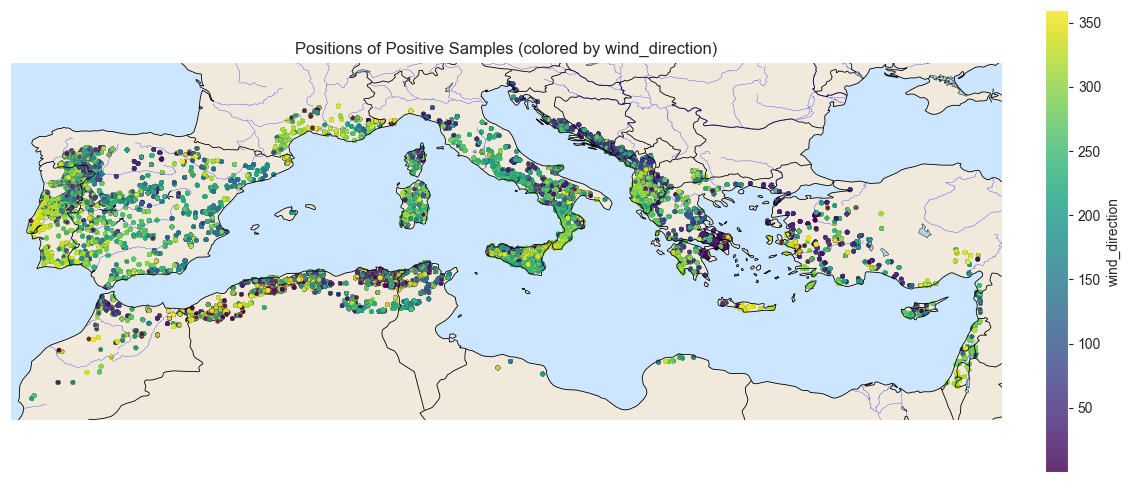

In [21]:
x = pos_data['x']
y = pos_data['y']
influence_variable = pos_data['wind_direction']

# Plot mit Cartopy
fig = plt.figure(figsize=(14, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([x.min() - 1, x.max() + 1, y.min() - 1, y.max() + 1], crs=ccrs.PlateCarree())
#ax.stock_img()

# Features hinzufügen
ax.add_feature(cfeature.LAND.with_scale('50m'), facecolor='#f0e9dc')  # Sandfarben
ax.add_feature(cfeature.OCEAN.with_scale('50m'), facecolor='#cce6ff')  # Hellblau
ax.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=0.6)
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.6)
ax.add_feature(cfeature.LAKES.with_scale('10m'), facecolor='lightblue', edgecolor='k', linewidth=0.3)
ax.add_feature(cfeature.RIVERS.with_scale('10m'), edgecolor='blue', linewidth=0.2)

# Scatter mit Farbe nach Population
sc = ax.scatter(x, y, c=influence_variable, cmap='viridis', s=5, alpha=0.8, vmin=influence_variable.min(), vmax=influence_variable.max(), transform=ccrs.PlateCarree())

# Farbskala
cb = plt.colorbar(sc, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
cb.set_label(f'{influence_variable.name}')

# Titel
plt.title(f"Positions of Positive Samples (colored by {influence_variable.name})")

plt.show()

In [22]:
ignition_dates = pos_data[pos_data['time_idx'] == 0]
sum_ignition = ignition_dates['time'].count()
sum_ignition

8574

In [23]:
#Helperfunction to annotate bars in a stacked vertical bar chart
def annotate_bars_stacked_vertical(ax, x, shap_1, shap_2, width):
    for i, (v1, v2) in enumerate(zip(shap_1, shap_2)):
        same_sign = np.sign(v1) == np.sign(v2)
        dx = 0.25  

        if same_sign:
            if abs(v1) >= abs(v2):
                top_val, bot_val = v1, v2
                top_color, bot_color = "navy", "darkred"
                top_dx, bot_dx = -dx, +dx  
            else:
                top_val, bot_val = v2, v1
                top_color, bot_color = "darkred", "navy"
                top_dx, bot_dx = +dx, -dx  

            direction = np.sign(top_val)

            offset_top = 0.008 + 0.025 * abs(top_val)
            offset_between = 0.008  

            y_top = top_val + offset_top if direction > 0 else top_val - offset_top
            y_bot = y_top - offset_between if direction > 0 else y_top + offset_between
            va = 'bottom' if direction > 0 else 'top'

            ax.text(x[i] + top_dx, y_top, f"{top_val:.2f}", ha='center', va=va, fontsize=8, color=top_color)
            ax.text(x[i] + bot_dx, y_bot, f"{bot_val:.2f}", ha='center', va=va, fontsize=8, color=bot_color)

        else:
            for val, dx_sign, color in zip([v1, v2], [-width/2, +width/2], ["navy", "darkred"]):
                offset = 0.002 + 0.05 * abs(val)
                y_pos = val + offset if val >= 0 else val - offset
                va = 'bottom' if val >= 0 else 'top'
                ax.text(x[i] + dx_sign, y_pos, f"{val:.2f}", ha='center', va=va, fontsize=8, color=color)


In [66]:
wo_lst_day_1="/Users/I566184/bachelorarbeit_coding/mesogeos/csv/Case_Studies/shap_waterfall_grouped_Transformer_sample679-without-lst_day.csv"
wo_lst_day_2="/Users/I566184/bachelorarbeit_coding/mesogeos/csv/Case_Studies/shap_waterfall_grouped_Transformer_sample1645-without-lst_day.csv"

w_lst_day_1="/Users/I566184/bachelorarbeit_coding/mesogeos/csv/Case_Studies/shap_waterfall_grouped_Transformer_sample679.csv"
w_lst_day_2="/Users/I566184/bachelorarbeit_coding/mesogeos/csv/Case_Studies/shap_waterfall_grouped_Transformer_sample1645.csv"

ig_path_1 = "/Users/I566184/bachelorarbeit_coding/mesogeos/csv/Case_Studies/ig_waterfall_grouped_Transformer_sample679.csv"
ig_path_2 = "/Users/I566184/bachelorarbeit_coding/mesogeos/csv/Case_Studies/ig_waterfall_grouped_Transformer_sample1645.csv"

TP = pd.read_csv(w_lst_day_1)
FN = pd.read_csv(w_lst_day_2)

TP_w_lst_day = pd.read_csv(w_lst_day_1)
FN_w_lst_day = pd.read_csv(w_lst_day_2)

TP_wo_lst_day = pd.read_csv(wo_lst_day_1)
FN_wo_lst_day = pd.read_csv(wo_lst_day_2)

TP_ig = pd.read_csv(ig_path_1)
FN_ig = pd.read_csv(ig_path_2)


feature_groups = {
    "Fuel": [
        "lai", "ndvi", "lc_agriculture", "lc_forest", "lc_grassland", "lc_shrubland",
        "lc_sparse_vegetation", "lc_settlement", "lc_water_bodies", "lc_wetland"
    ],
    "Meteorology": [
        "d2m", "lst_day", "lst_night", "rh", "smi", "sp", "ssrd", "t2m", "tp", "wind_speed"
    ],
    "Human Factors": [
        "population", "roads_distance"
    ],
    "Topographical Data": [
        "dem", "slope"
    ]
}

def assign_group(feature):
    for group, features in feature_groups.items():
        if feature in features:
            return group
    return "Unknown"

TP["group"] = TP["feature"].apply(assign_group)
grouped_TP = TP.groupby("group")["shap_value"].sum().reset_index()
grouped_TP = grouped_TP.rename(columns={"group": "feature"})

FN["group"] = FN["feature"].apply(assign_group)
grouped_FN = FN.groupby("group")["shap_value"].sum().reset_index()
grouped_FN = grouped_FN.rename(columns={"group": "feature"})

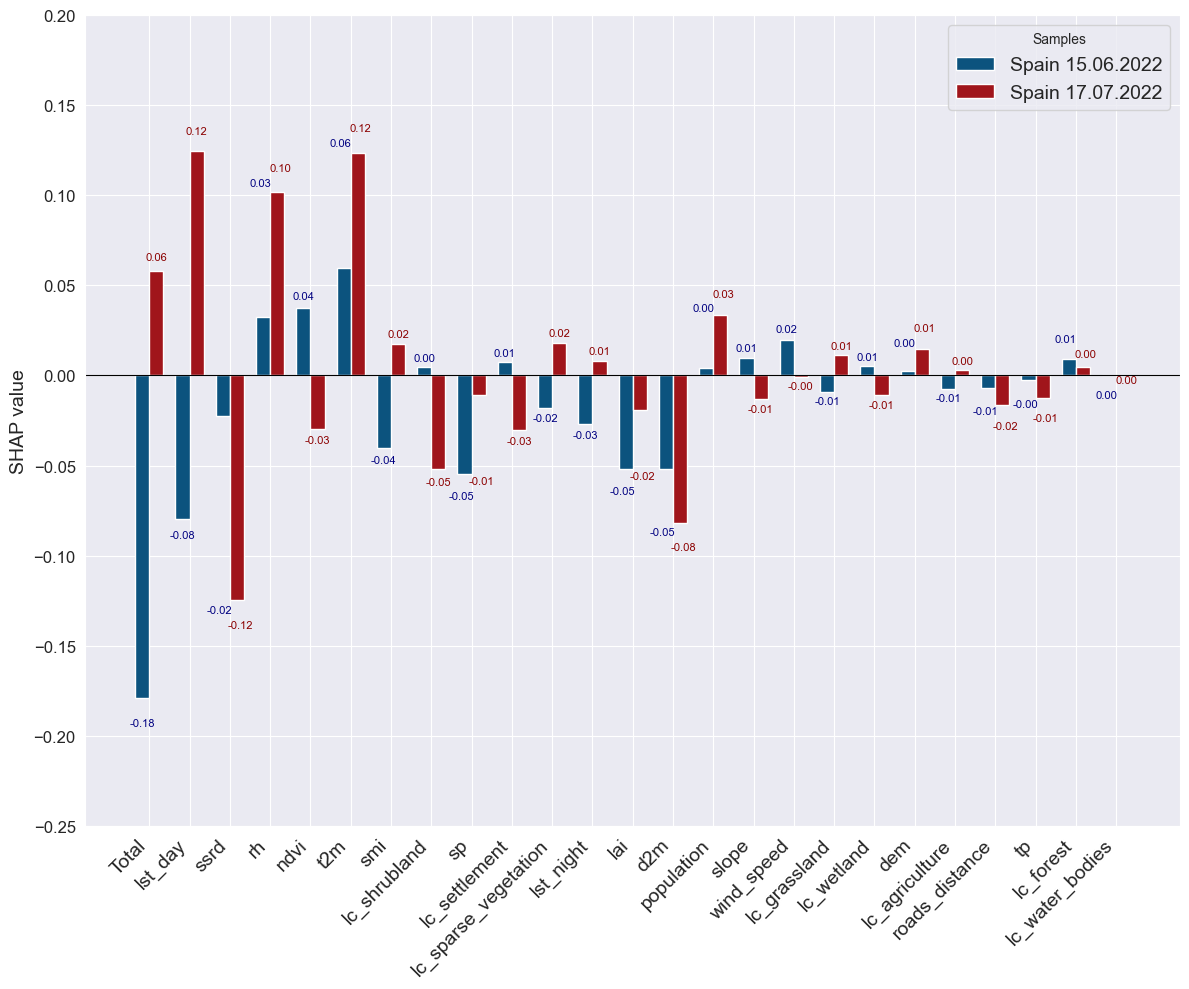

In [81]:
#csv data is created from waterfall method in plot_shap.py
def plot_grouped_shap_comparison_sorted(df_1, df_2):

    assert all(df_1['feature'] == df_2['feature']), "Features in den CSVs stimmen nicht überein."

    abs_sum_1 = df_1['shap_value'].sum()
    abs_sum_2 = df_2['shap_value'].sum()

    df_1['diff'] = (df_1['shap_value'] - df_2['shap_value']).abs()
    df_sorted = df_1.sort_values(by="diff", ascending=False).reset_index(drop=True) #.head(10)

    features = ["Total"] + df_sorted['feature'].tolist()
    shap_1 = [abs_sum_1] + df_1.set_index('feature').loc[df_sorted['feature'], 'shap_value'].tolist()
    shap_2 = [abs_sum_2] + df_2.set_index('feature').loc[df_sorted['feature'], 'shap_value'].tolist()

    x = np.arange(len(features))
    width = 0.35

    fig, ax = plt.subplots(figsize=(12, 10))

    #norm = plt.Normalize(min(shap_1 + shap_2), max(shap_1 + shap_2))
    #colors_1 = cm.Blues_r(norm(shap_1))
    #colors_2 = cm.Reds(norm(shap_2))

    norm = Normalize(0, max(np.abs(shap_1 + shap_2)))
    #colors_1 = [cm.Blues(0.4 + 0.7 * norm(abs(val))) for val in shap_1]    
    #colors_2 = [cm.Reds(0.4 + 0.7 * norm(abs(val))) for val in shap_2]

    dark_blue = "#0C537E"   # dunkles Blau
    dark_red = "#A0151B"    # dunkles Rot

    bars1 = ax.bar(x - width/2, shap_1, width, color=dark_blue, label="Spain 15.06.2022")
    bars2 = ax.bar(x + width/2, shap_2, width, color=dark_red, label="Spain 17.07.2022")

    annotate_bars_stacked_vertical(ax, x, shap_1, shap_2, width)


    ax.set_ylabel("SHAP value", fontsize=14, fontweight='medium')
    ax.tick_params(axis='y', labelsize=12)
    
    ax.set_xticks(x)
    ax.set_xticklabels(features, rotation=45, fontsize=14, ha="right", fontweight='medium')
    ax.legend(title="Samples", fontsize=14)
    ax.axhline(0, color='black', linewidth=0.8)
    ax.set_ylim(-0.25, 0.2)
    ax.yaxis.set_major_locator(MultipleLocator(0.05))

    plt.tight_layout()
    plt.savefig('/Users/I566184/Library/Mobile Documents/com~apple~CloudDocs/Uni/Wirtschaftsinformatik KIT/Semester6/Bachlorarbeit/Graphics/Results/Case_studies/Transformer_SHAP_Two_Spain_without_lst_day_all.pdf', format="pdf", dpi=300)
    plt.show()
    

plot_grouped_shap_comparison_sorted(FN, TP)

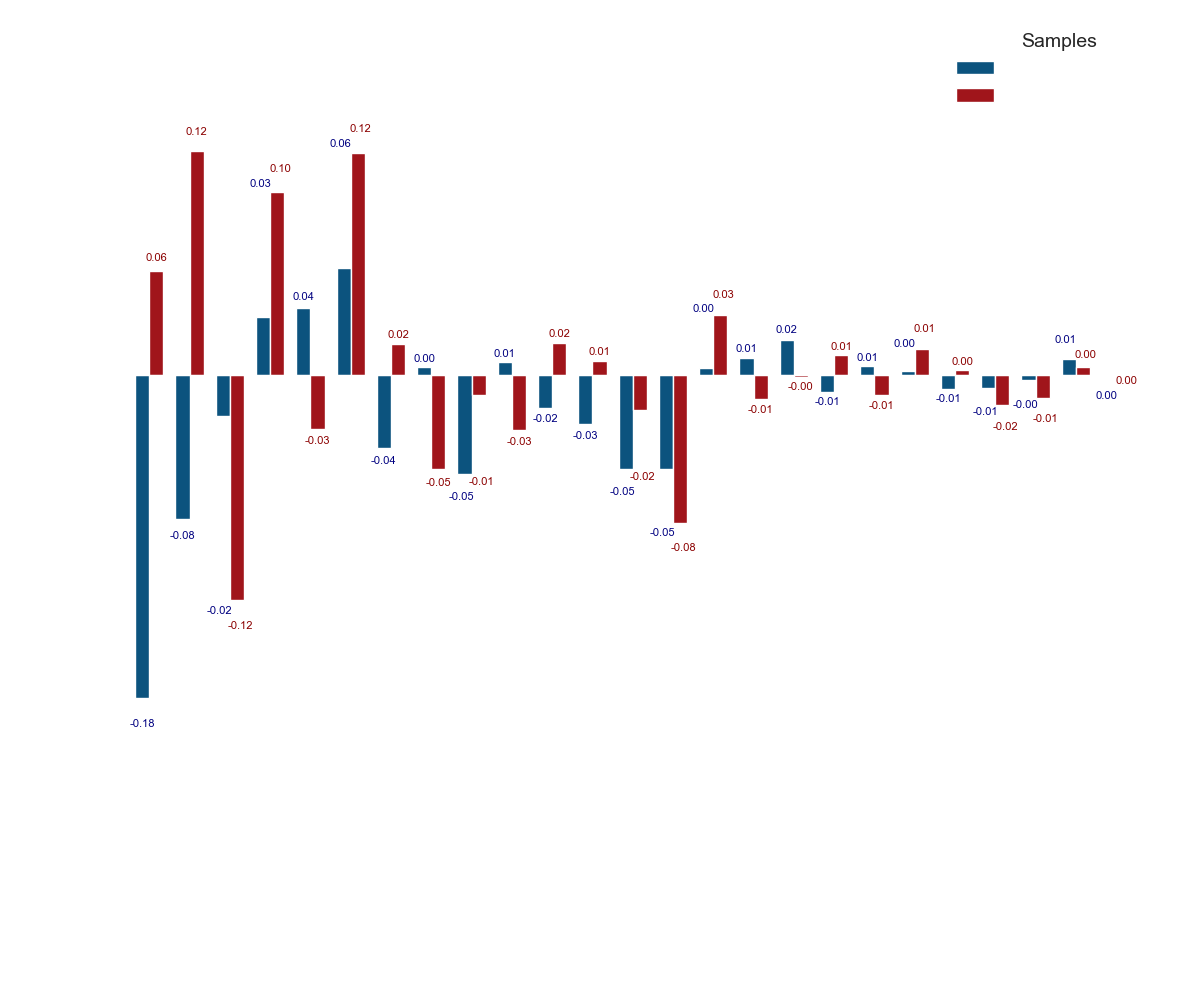

In [86]:
def plot_grouped_shap_comparison_sorted_transparent(df_1, df_2):

    assert all(df_1['feature'] == df_2['feature']), "Features in den CSVs stimmen nicht überein."

    abs_sum_1 = df_1['shap_value'].sum()
    abs_sum_2 = df_2['shap_value'].sum()

    df_1['diff'] = (df_1['shap_value'] - df_2['shap_value']).abs()
    df_sorted = df_1.sort_values(by="diff", ascending=False).reset_index(drop=True)

    features = ["Total"] + df_sorted['feature'].tolist()
    shap_1 = [abs_sum_1] + df_1.set_index('feature').loc[df_sorted['feature'], 'shap_value'].tolist()
    shap_2 = [abs_sum_2] + df_2.set_index('feature').loc[df_sorted['feature'], 'shap_value'].tolist()

    x = np.arange(len(features))
    width = 0.35

    fig, ax = plt.subplots(figsize=(12, 10), facecolor='none')  # Transparenter Hintergrund für die Figur
    fig.patch.set_alpha(0.0)

    norm = Normalize(0, max(np.abs(shap_1 + shap_2)))
    dark_blue = "#0C537E"
    dark_red = "#A0151B"

    bars1 = ax.bar(x - width/2, shap_1, width, color=dark_blue, label="Spain 15.06.2022")
    bars2 = ax.bar(x + width/2, shap_2, width, color=dark_red, label="Spain 17.07.2022")

    annotate_bars_stacked_vertical(ax, x, shap_1, shap_2, width)

    # Achsen und Labels in Weiß setzen
    ax.set_facecolor('none')
    ax.spines['bottom'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(axis='x', colors='white', labelsize=14)
    ax.tick_params(axis='y', colors='white', labelsize=12)

    ax.set_ylabel("SHAP value", fontsize=14, fontweight='medium', color='white')
    ax.set_xticks(x)
    ax.set_xticklabels(features, rotation=45, fontsize=14, ha="right", fontweight='medium', color='white')
    ax.legend(title="Samples", fontsize=14, labelcolor='white', title_fontsize=14, facecolor='none', edgecolor='white')
    ax.axhline(0, color='white', linewidth=0.8)
    ax.set_ylim(-0.25, 0.2)
    ax.yaxis.set_major_locator(MultipleLocator(0.05))

    plt.tight_layout()
    # Transparenter Hintergrund beim Speichern
    plt.savefig('/Users/I566184/Library/Mobile Documents/com~apple~CloudDocs/Uni/Wirtschaftsinformatik KIT/Semester6/Bachlorarbeit/Graphics/Results/Case_studies/Transformer_SHAP_Two_Spain_all_transparent.pdf', format="pdf", dpi=300)
    plt.show()
plot_grouped_shap_comparison_sorted_transparent(FN, TP)

In [93]:
def plot_grouped_shap_comparison_sorted_transparent_black(df_1, df_2):

    assert all(df_1['feature'] == df_2['feature']), "Features in den CSVs stimmen nicht überein."

    abs_sum_1 = df_1['shap_value'].sum()
    abs_sum_2 = df_2['shap_value'].sum()

    df_1['diff'] = (df_1['shap_value'] - df_2['shap_value']).abs()
    df_sorted = df_1.sort_values(by="diff", ascending=False).reset_index(drop=True)

    features = ["Total"] + df_sorted['feature'].tolist()
    shap_1 = [abs_sum_1] + df_1.set_index('feature').loc[df_sorted['feature'], 'shap_value'].tolist()
    shap_2 = [abs_sum_2] + df_2.set_index('feature').loc[df_sorted['feature'], 'shap_value'].tolist()

    x = np.arange(len(features))
    width = 0.35

    fig, ax = plt.subplots(figsize=(12, 10), facecolor='none')  # Transparenter Hintergrund für die Figur
    fig.patch.set_alpha(0.0)

    norm = Normalize(0, max(np.abs(shap_1 + shap_2)))
    dark_blue = "#0C537E"
    dark_red = "#A0151B"

    bars1 = ax.bar(x - width/2, shap_1, width, color=dark_blue, label="Spain 15.06.2022")
    bars2 = ax.bar(x + width/2, shap_2, width, color=dark_red, label="Spain 17.07.2022")

    annotate_bars_stacked_vertical(ax, x, shap_1, shap_2, width)

    # Achsen und Labels in Weiß setzen
    ax.set_facecolor('none')
    ax.spines['bottom']. set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(axis='x', colors='black', labelsize=14)
    ax.tick_params(axis='y', colors='black', labelsize=12)
    # Gitter hinzufügen und schwarz einfärben
    ax.grid(True, color='black', linestyle='-', linewidth=0.7, alpha=0.6)


    ax.set_ylabel("SHAP value", fontsize=14, fontweight='medium', color='black')
    ax.set_xticks(x)
    ax.set_xticklabels(features, rotation=45, fontsize=14, ha="right", fontweight='medium', color='black')
    ax.legend(title="Samples", fontsize=14, labelcolor='black', title_fontsize=14, facecolor='none', edgecolor='black')
    ax.axhline(0, color='black', linewidth=0.8)
    ax.set_ylim(-0.25, 0.2)
    ax.yaxis.set_major_locator(MultipleLocator(0.05))

    plt.tight_layout()
    # Transparenter Hintergrund beim Speichern
    plt.savefig('/Users/I566184/Library/Mobile Documents/com~apple~CloudDocs/Uni/Wirtschaftsinformatik KIT/Semester6/Bachlorarbeit/Graphics/Results/Case_studies/Transformer_SHAP_Two_Spain_all_without_transparent_black.pdf', format="pdf", dpi=300)
    plt.show()
#plot_grouped_shap_comparison_sorted_transparent_black(FN, TP)

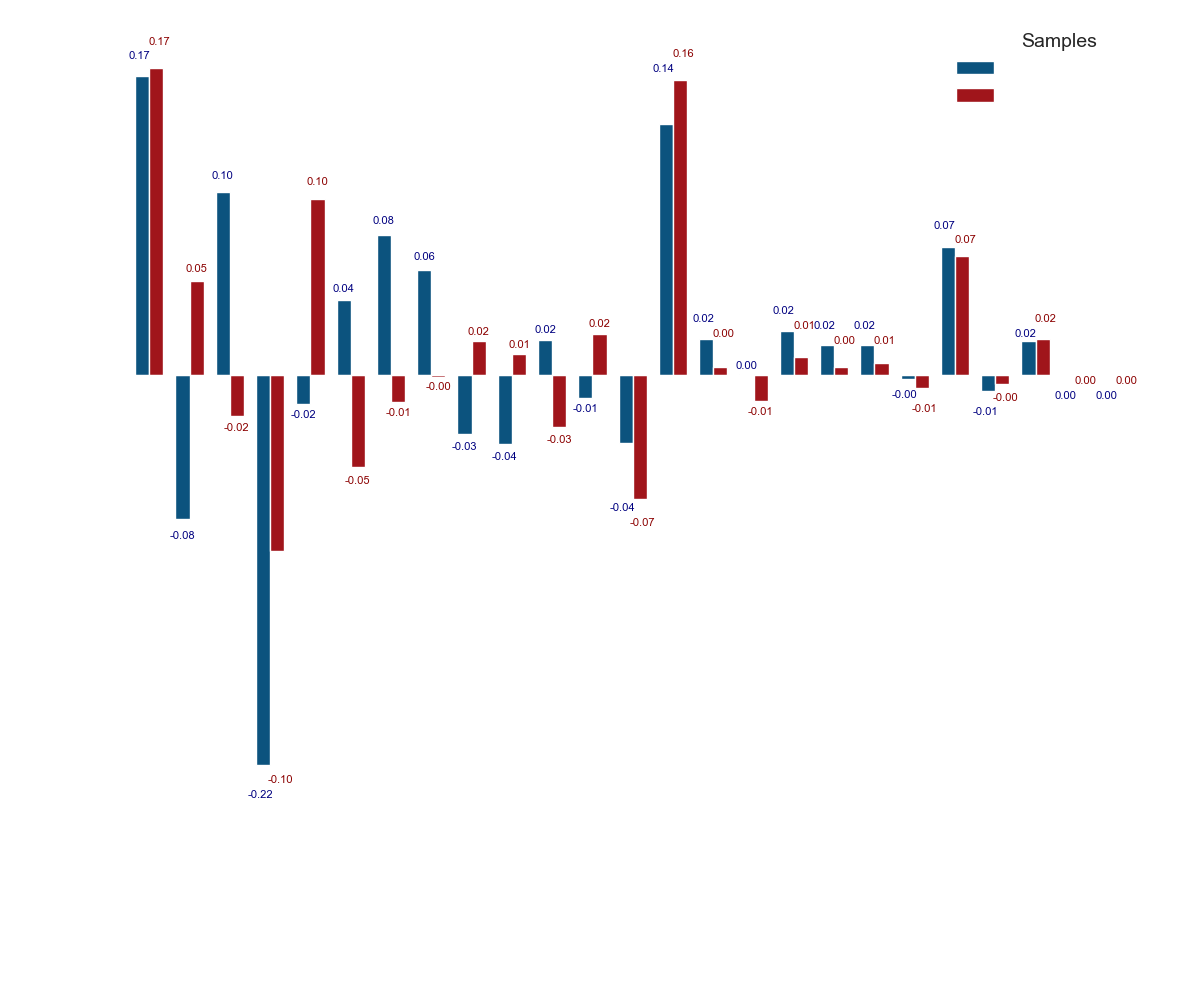

In [85]:
plot_grouped_shap_comparison_sorted(FN_wo_lst_day, TP_wo_lst_day)

In [75]:
def annotate_bars_stacked_vertical_ig(ax, x, shap_1, shap_2, width):
    for i, (v1, v2) in enumerate(zip(shap_1, shap_2)):
        same_sign = np.sign(v1) == np.sign(v2)
        dx = 0.25
        min_separation = 0.03  # Minimaler Abstand zwischen fast gleichen Werten

        def dynamic_offset(value):
            """Berechne dynamischen Offset: kleine Balken -> größerer Abstand."""
            base_offset = 0.011
            scale_factor = 0.04
            min_extra = 0.03  # Zusatzoffset bei sehr kleinen Balken
            if abs(value) < 0.1:
                return base_offset + min_extra  # Extra Abstand für sehr kleine Balken
            return base_offset + scale_factor * abs(value)

        if same_sign:
            if abs(v1) >= abs(v2):
                top_val, bot_val = v1, v2
                top_color, bot_color = "navy", "darkred"
                top_dx, bot_dx = -dx, +dx
            else:
                top_val, bot_val = v2, v1
                top_color, bot_color = "darkred", "navy"
                top_dx, bot_dx = +dx, -dx

            direction = np.sign(top_val)

            offset_top = dynamic_offset(top_val)
            offset_between = max(min_separation, 0.008)

            y_top = top_val + offset_top if direction > 0 else top_val - offset_top
            y_bot = y_top - offset_between if direction > 0 else y_top + offset_between
            va = 'bottom' if direction > 0 else 'top'

            ax.text(x[i] + top_dx, y_top, f"{top_val:.2f}", ha='center', va=va, fontsize=8, color=top_color)
            ax.text(x[i] + bot_dx, y_bot, f"{bot_val:.2f}", ha='center', va=va, fontsize=8, color=bot_color)

        else:
            for val, dx_sign, color in zip([v1, v2], [-width/2, +width/2], ["navy", "darkred"]):
                offset = dynamic_offset(val)  # Dynamischer Offset auch hier
                y_pos = val + offset if val >= 0 else val - offset
                va = 'bottom' if val >= 0 else 'top'
                ax.text(x[i] + dx_sign, y_pos, f"{val:.2f}", ha='center', va=va, fontsize=8, color=color)


In [76]:
#fixed order for features in the bar chart to keep the same order as in shap plot
def plot_grouped_ig_comparison_fixed(df_1, df_2):
    assert all(df_1['feature'] == df_2['feature']), "Features in den CSVs stimmen nicht überein."

    fixed_order = [
        "Total", "lst_day", "ssrd", "rh", "ndvi", "t2m", "smi", "lc_shrubland", "sp",
        "lc_settlement", "sparse_vegetation", "lst_night", "lai", "d2m", "population",
        "slope", "wind_speed", "lc_grassland", "lc_wetland", "dem", "lc_agriculture",
        "roads_distance", "tp", "lc_forest", "lc_water_bodies"
    ]

    abs_sum_1 = df_1['ig_value'].sum()
    abs_sum_2 = df_2['ig_value'].sum()

    df_1 = df_1.set_index('feature')
    df_2 = df_2.set_index('feature')

    features = [f for f in fixed_order if f in df_1.index or f == "Total"]
    shap_1 = [abs_sum_1 if f == "Total" else df_1.loc[f, 'ig_value'] for f in features]
    shap_2 = [abs_sum_2 if f == "Total" else df_2.loc[f, 'ig_value'] for f in features]

    x = np.arange(len(features))
    width = 0.35

    fig, ax = plt.subplots(figsize=(12, 10))

    dark_blue = "#0C537E"   # dunkles Blau
    dark_red = "#A0151B"    # dunkles Rot

    norm = Normalize(0, max(np.abs(shap_1 + shap_2)))
    colors_1 = [cm.Blues(0.4 + 0.7 * norm(abs(val))) for val in shap_1]
    colors_2 = [cm.Reds(0.4 + 0.7 * norm(abs(val))) for val in shap_2]

    bars1 = ax.bar(x - width/2, shap_1, width, color=dark_blue, label="Spain 15.06.2022")
    bars2 = ax.bar(x + width/2, shap_2, width, color=dark_red, label="Spain 17.07.2022")

    annotate_bars_stacked_vertical_ig(ax, x, shap_1, shap_2, width)

    ax.set_ylabel("IG value", fontsize=14, fontweight='medium')
    ax.tick_params(axis='y', labelsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels(features, rotation=45, fontsize=14, ha="right", fontweight='medium')
    ax.legend(title="Samples", fontsize=14)
    ax.axhline(0, color='black', linewidth=0.8)

    plt.tight_layout()
    plt.savefig('/Users/I566184/Library/Mobile Documents/com~apple~CloudDocs/Uni/Wirtschaftsinformatik KIT/Semester6/Bachlorarbeit/Graphics/Results/Case_studies/Transformer_IG_Two_Spain_all.pdf', format="pdf", dpi=300)
    plt.show()

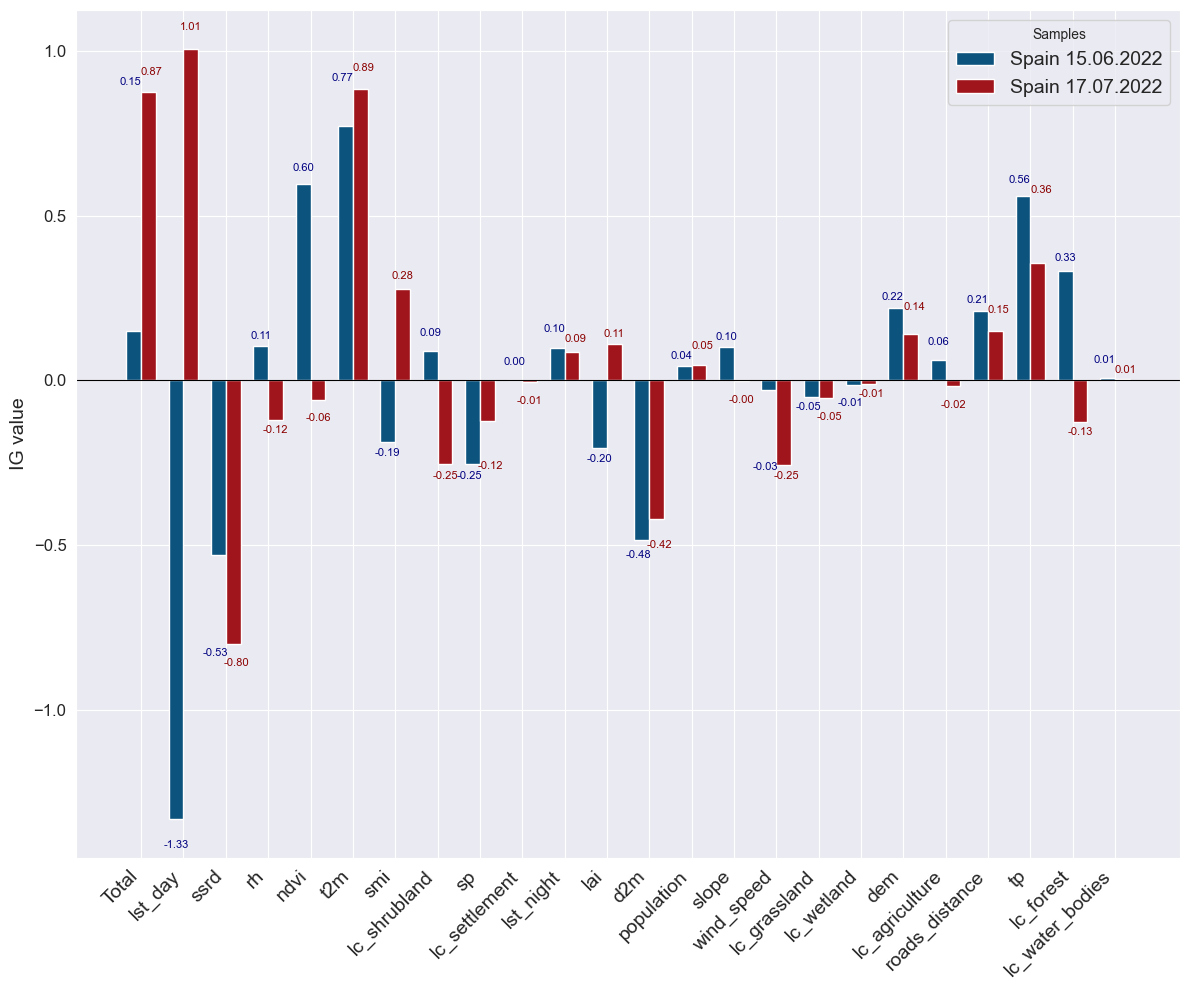

In [77]:
plot_grouped_ig_comparison_fixed(FN_ig, TP_ig)

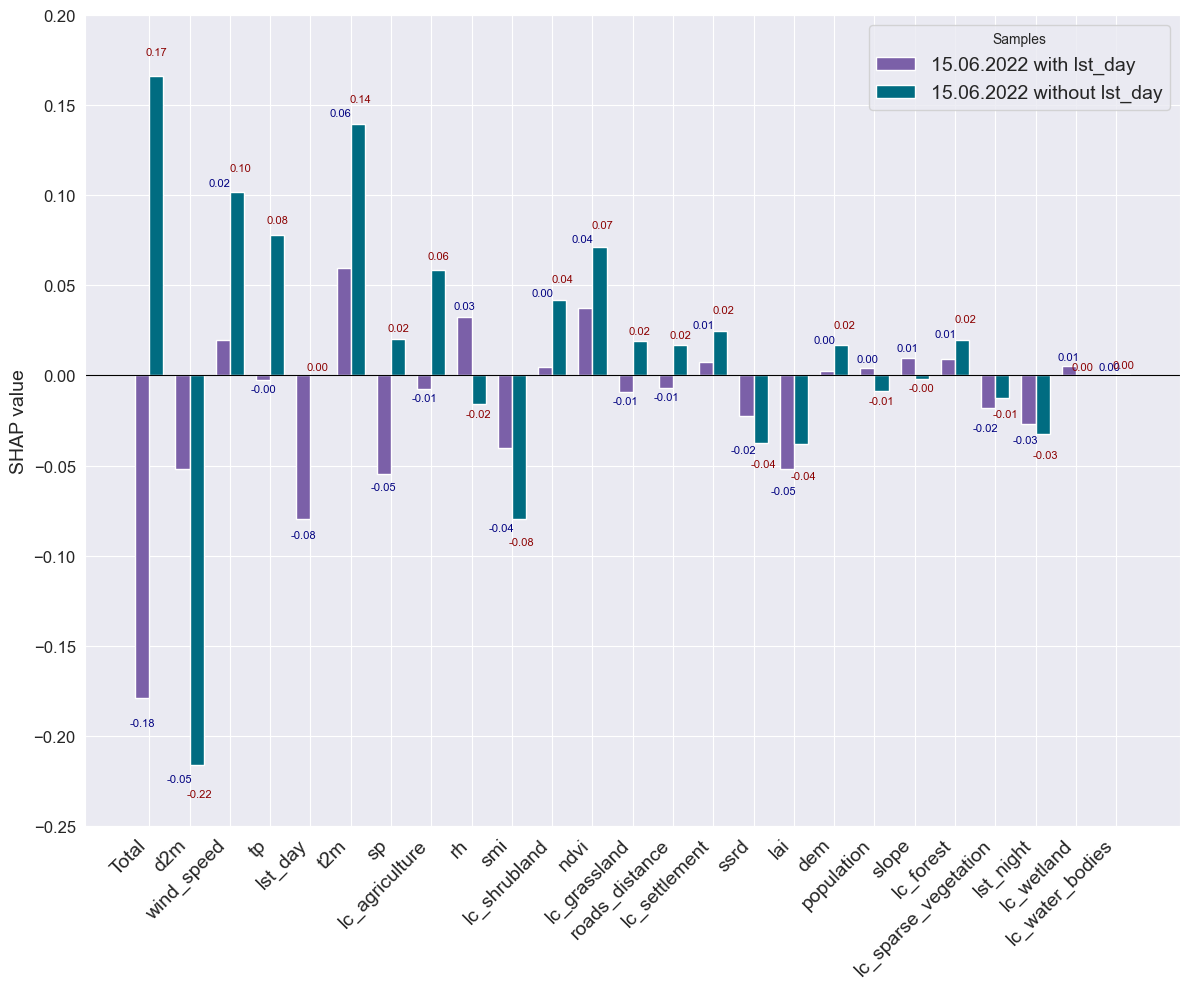

In [71]:
#csv data is created from waterfall method in plot_shap.py
def plot_grouped_shap_comparison_sorted(df_1, df_2):

    assert all(df_1['feature'] == df_2['feature']), "Features in den CSVs stimmen nicht überein."

    abs_sum_1 = df_1['shap_value'].sum()
    abs_sum_2 = df_2['shap_value'].sum()

    df_1['diff'] = (df_1['shap_value'] - df_2['shap_value']).abs()
    df_sorted = df_1.sort_values(by="diff", ascending=False).reset_index(drop=True) #.head(10)

    features = ["Total"] + df_sorted['feature'].tolist()
    shap_1 = [abs_sum_1] + df_1.set_index('feature').loc[df_sorted['feature'], 'shap_value'].tolist()
    shap_2 = [abs_sum_2] + df_2.set_index('feature').loc[df_sorted['feature'], 'shap_value'].tolist()

    x = np.arange(len(features))
    width = 0.35

    fig, ax = plt.subplots(figsize=(12, 10))

    #norm = plt.Normalize(min(shap_1 + shap_2), max(shap_1 + shap_2))
    #colors_1 = cm.Blues_r(norm(shap_1))
    #colors_2 = cm.Reds(norm(shap_2))

    norm = Normalize(0, max(np.abs(shap_1 + shap_2)))
    colors_1 = [cm.Blues(0.4 + 0.7 * norm(abs(val))) for val in shap_1]
    colors_2 = [cm.Reds(0.4 + 0.7 * norm(abs(val))) for val in shap_2]



    #norm = Normalize(vmin=0, vmax=max(np.max(np.abs(shap_1)), np.max(np.abs(shap_2))))


    blau_cmap = LinearSegmentedColormap.from_list("blauviolett", ["#eff3ff", "#6a51a3"])


    tuerkis_cmap = LinearSegmentedColormap.from_list("tuerkis", ["#16C1E5", "#005f73"]) #c6f6f6
    blau = "#7B60A8"
    tuerkis = "#006C81"
    
    
    colors_1 = [blau_cmap(0.4 + 0.6 * norm(abs(val))) for val in shap_1]
    colors_2 = [tuerkis_cmap(0.4 + 0.6 * norm(abs(val))) for val in shap_2]

    bars1 = ax.bar(x - width/2, shap_1, width, color=blau, label="15.06.2022 with lst_day")
    bars2 = ax.bar(x + width/2, shap_2, width, color=tuerkis, label="15.06.2022 without lst_day")

    annotate_bars_stacked_vertical(ax, x, shap_1, shap_2, width)


    ax.set_ylabel("SHAP value", fontsize=14, fontweight='medium')
    ax.tick_params(axis='y', labelsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels(features, rotation=45, fontsize=14, ha="right", fontweight='medium')
    ax.legend(title="Samples", fontsize=14)
    ax.axhline(0, color='black', linewidth=0.8)
    ax.set_ylim(-0.25, 0.2)
    ax.yaxis.set_major_locator(MultipleLocator(0.05))

    plt.tight_layout()
    plt.savefig('/Users/I566184/Library/Mobile Documents/com~apple~CloudDocs/Uni/Wirtschaftsinformatik KIT/Semester6/Bachlorarbeit/Graphics/Results/Case_studies/Transformer_SHAP_FN_Spain_all.pdf', format="pdf", dpi=300)
    plt.show()


plot_grouped_shap_comparison_sorted(FN_w_lst_day, FN_wo_lst_day)

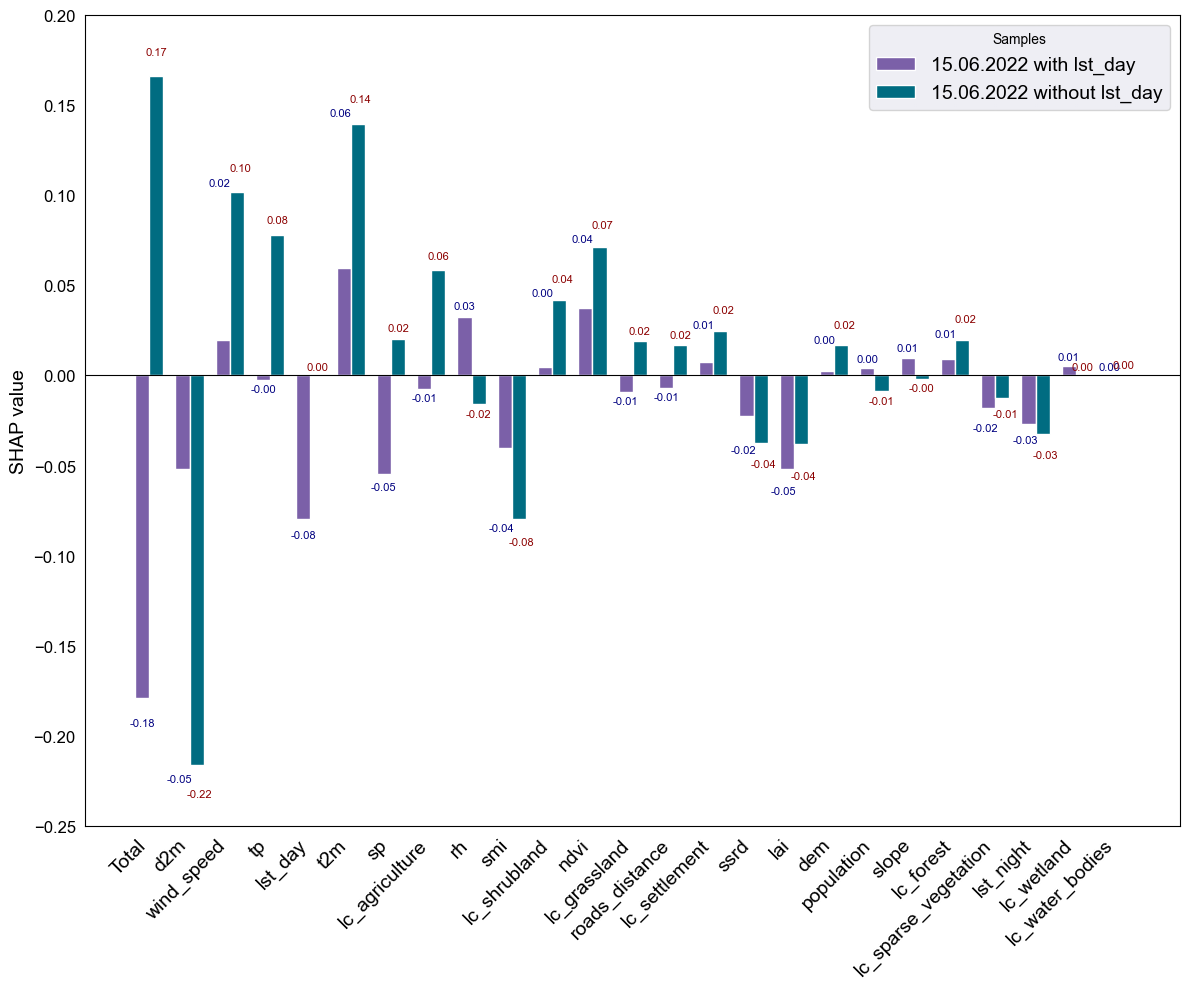

In [96]:
def plot_grouped_shap_comparison_sorted(df_1, df_2):

    assert all(df_1['feature'] == df_2['feature']), "Features in den CSVs stimmen nicht überein."

    abs_sum_1 = df_1['shap_value'].sum()
    abs_sum_2 = df_2['shap_value'].sum()

    df_1['diff'] = (df_1['shap_value'] - df_2['shap_value']).abs()
    df_sorted = df_1.sort_values(by="diff", ascending=False).reset_index(drop=True)

    features = ["Total"] + df_sorted['feature'].tolist()
    shap_1 = [abs_sum_1] + df_1.set_index('feature').loc[df_sorted['feature'], 'shap_value'].tolist()
    shap_2 = [abs_sum_2] + df_2.set_index('feature').loc[df_sorted['feature'], 'shap_value'].tolist()

    x = np.arange(len(features))
    width = 0.35

    fig, ax = plt.subplots(figsize=(12, 10))
    fig.patch.set_alpha(0.0)       # Transparenter Hintergrund (außerhalb Plotbereich)
    ax.set_facecolor("none")       # Transparenter Plot-Hintergrund

    norm = Normalize(0, max(np.abs(shap_1 + shap_2)))
    blau_cmap = LinearSegmentedColormap.from_list("blauviolett", ["#eff3ff", "#6a51a3"])
    tuerkis_cmap = LinearSegmentedColormap.from_list("tuerkis", ["#16C1E5", "#005f73"])

    blau = "#7B60A8"
    tuerkis = "#006C81"

    colors_1 = [blau_cmap(0.4 + 0.6 * norm(abs(val))) for val in shap_1]
    colors_2 = [tuerkis_cmap(0.4 + 0.6 * norm(abs(val))) for val in shap_2]

    bars1 = ax.bar(x - width/2, shap_1, width, color=blau, label="15.06.2022 with lst_day")
    bars2 = ax.bar(x + width/2, shap_2, width, color=tuerkis, label="15.06.2022 without lst_day")

    annotate_bars_stacked_vertical(ax, x, shap_1, shap_2, width)

    # Achsen- und Tick-Einstellungen (schwarze Schrift)
    ax.set_ylabel("SHAP value", fontsize=14, fontweight='medium', color="black")
    ax.tick_params(axis='y', labelsize=12, colors="black")
    ax.tick_params(axis='x', colors="black")
    ax.set_xticks(x)
    ax.set_xticklabels(features, rotation=45, fontsize=14, ha="right", fontweight='medium', color="black")

    # Achsenlinien schwarz
    for spine in ax.spines.values():
        spine.set_color("black")

    # Legende schwarz
    legend = ax.legend(title="Samples", fontsize=14)
    legend.get_title().set_color("black")
    for text in legend.get_texts():
        text.set_color("black")

    ax.axhline(0, color='black', linewidth=0.8)
    ax.set_ylim(-0.25, 0.2)
    ax.yaxis.set_major_locator(MultipleLocator(0.05))

    plt.tight_layout()
    plt.savefig(
        '/Users/I566184/Library/Mobile Documents/com~apple~CloudDocs/Uni/Wirtschaftsinformatik KIT/Semester6/Bachlorarbeit/Graphics/Results/Case_studies/Transformer_SHAP_FN_Spain_all.pdf',
        format="pdf",
        dpi=300,
        transparent=True    # Speichern mit transparentem Hintergrund
    )
    plt.show()
plot_grouped_shap_comparison_sorted(FN_w_lst_day, FN_wo_lst_day)